In [1]:
# Reference: https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
# The above link contains the code for all the helper modules imported below and original code

In [3]:
# Importing Metrica helper modules
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Set up initial path to data
DATADIR = 'Desktop/Football Analytics/Data/Metrica/data'
game_id = 2

In [6]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

# read in tracking data
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [7]:
# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [8]:
# reverse direction of play in the second half so that home team is always attacking from right to left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

In [9]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [10]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tracking_home.describe()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
count,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,...,125738.000000,125738.000000,45454.000000,45454.000000,35046.000000,35046.000000,15419.000000,15419.000000,83272.000000,83272.000000
mean,1.518681,2823.140000,39.716046,0.044372,8.440648,13.897381,15.017162,6.357901,15.001056,-5.494028,...,-11.642392,-4.581938,-0.678142,8.561785,6.540521,4.896060,13.021101,15.378184,-1.558624,-0.842413
std,0.499653,1629.934865,8.656187,3.288165,23.779623,13.607189,19.437791,8.967438,21.577015,9.433698,...,22.094306,10.865545,25.264571,12.464735,23.782218,9.516354,21.097711,11.294934,23.224710,19.769965
min,1.000000,0.040000,14.095880,-15.724320,-56.539340,-31.102520,-49.244420,-29.490920,-51.334740,-36.091000,...,-58.112380,-36.129760,-48.516200,-32.136800,-50.276860,-15.981360,-34.967280,-9.186120,-55.088200,-36.645880
25%,1.000000,1411.590000,32.669995,-1.732640,-11.281845,6.740160,2.002340,0.191760,4.128435,-11.068360,...,-28.922895,-11.496080,-22.410255,0.495890,-13.386740,-2.791740,-0.115540,5.329840,-18.370065,-18.829200
50%,2.000000,2823.140000,40.465500,0.065960,9.855880,15.879360,15.774920,6.166240,17.253620,-4.274820,...,-11.587390,-4.743680,-2.576860,9.262280,7.953180,4.049060,17.284360,16.265600,-1.701300,-0.316540
75%,2.000000,4234.690000,47.396840,1.906720,27.084325,24.134050,30.256905,12.436010,31.049785,0.582760,...,1.649360,0.702440,20.573540,18.255960,26.605205,11.073800,28.049190,23.969320,15.134945,16.851250
max,2.000000,5646.240000,56.831900,24.050240,58.300000,37.376880,55.605480,36.987240,55.450720,26.848440,...,53.993220,34.174760,45.152820,34.269280,47.767840,34.112200,47.232540,34.622200,56.782080,36.109360


In [12]:
tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


In [13]:
tracking_away.describe()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
count,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,...,87985.000000,87985.000000,141156.000000,141156.000000,141156.000000,141156.000000,53172.000000,53172.000000,83272.000000,83272.000000
mean,1.518681,2823.140000,-40.532190,-0.128770,-9.498696,-16.930122,-14.321585,-7.289853,-14.952938,4.614865,...,3.467860,17.380139,10.450370,2.840660,10.556210,-2.457148,6.549772,-7.253989,-1.558624,-0.842413
std,0.499653,1629.934865,8.512415,2.431009,22.065324,10.290656,21.103361,9.736962,19.522271,7.872646,...,21.008837,10.284812,20.877713,12.369597,20.745412,12.185045,24.947130,14.765950,23.224710,19.769965
min,1.000000,0.040000,-56.890200,-17.572560,-53.347680,-37.400000,-55.040500,-34.272000,-52.925800,-21.872880,...,-45.489900,-23.621840,-51.404700,-34.608600,-48.450480,-35.226720,-49.385400,-35.934600,-55.088200,-36.645880
25%,1.000000,1411.590000,-47.957580,-1.227400,-27.006680,-25.115800,-30.803600,-13.788360,-30.631880,-0.800530,...,-12.098840,10.582840,-3.297660,-3.263490,-3.510720,-10.299450,-16.275240,-17.579360,-18.370065,-18.829200
50%,2.000000,2823.140000,-41.733790,-0.201960,-11.219570,-17.280160,-16.555080,-6.557920,-16.667440,4.204440,...,4.519840,18.149880,10.445240,4.153780,11.366380,-2.726120,7.950530,-7.722080,-1.701300,-0.316540
75%,2.000000,4234.690000,-34.779660,0.973760,4.490160,-9.486680,-3.037960,-1.213800,-2.772960,9.794720,...,20.038240,25.111720,26.714120,10.795680,27.356745,4.686560,29.307145,0.636480,15.134945,16.851250
max,2.000000,5646.240000,-12.695620,13.561920,48.872360,31.847800,52.892940,34.178840,49.152200,29.730960,...,57.267560,35.902640,55.986020,36.074000,57.744560,36.193680,51.686660,34.065280,56.782080,36.109360


In [14]:
# Making a movie of the second home team goal
PLOTDIR = '/Users/ranigopakumar/Desktop/Football Analytics/Personal/FoT-Personal/'
mviz.save_match_clip(tracking_home.iloc[73600:73600+500],tracking_away.iloc[73600:73600+500],PLOTDIR,fname='home_goal_2',include_player_velocities=False)

Generating movie...done


In [15]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5ece544f0>)

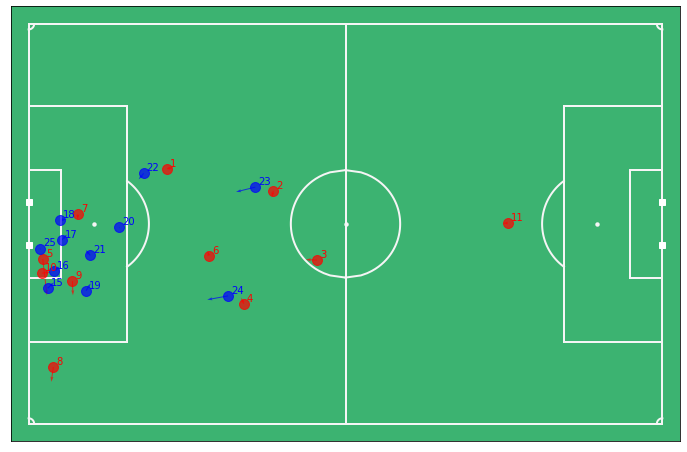

In [16]:
# Plot a random frame, plotting the player velocities using quivers
mviz.plot_frame( tracking_home.loc[10000], tracking_away.loc[10000], include_player_velocities=True, annotate=True)

In [17]:
# Create a Physical summary dataframe for home players
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players)

In [18]:
home_players

array(['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7',
       '8', '9'], dtype='<U2')

In [20]:
# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = ( tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)

In [21]:
# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

Text(0, 0.5, 'Distance covered [km]')

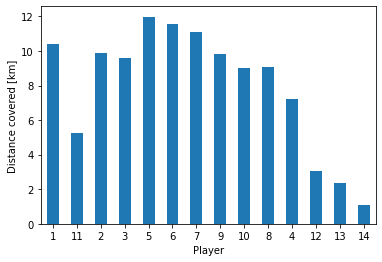

In [22]:
# Make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5dbf0b400>)

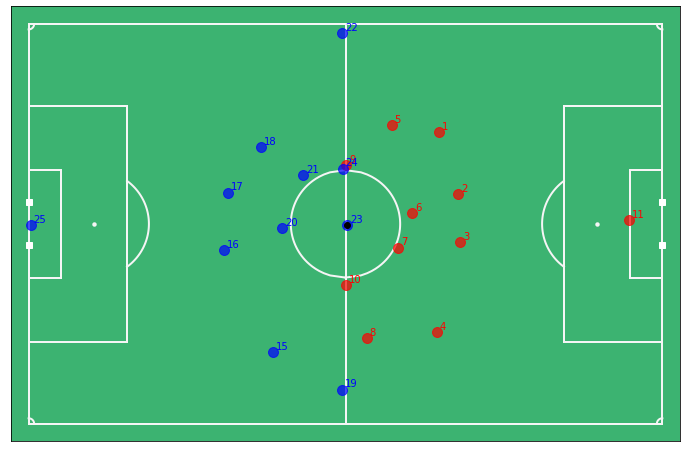

In [23]:
# plot positions at KO (to find out what position each player is playing)
mviz.plot_frame( tracking_home.loc[51], tracking_away.loc[51], include_player_velocities=False, annotate=True)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5dbf0be20>)

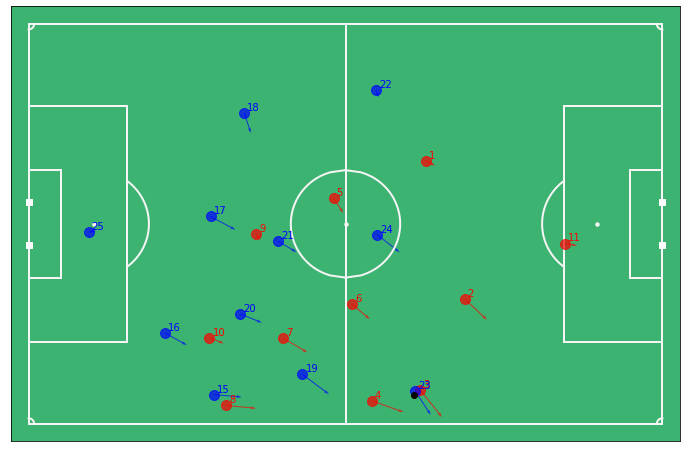

In [24]:
# plot positions at random frame
mviz.plot_frame( tracking_home.loc[500], tracking_away.loc[500], include_player_velocities=True, annotate=True)

In [25]:
# Calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home.loc[tracking_home[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[ tracking_home[column] >= 7, column].sum()/25./1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

In [26]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km]
1,94.104000,10.418124,3.708538,4.434862,2.177109,0.097614
11,94.104000,5.237010,4.413459,0.786952,0.031087,0.005512
2,94.104000,9.896841,4.083395,4.077484,1.632026,0.103936
3,94.104000,9.591745,4.179823,3.851974,1.394199,0.165750
5,94.104000,11.979224,3.588130,4.666655,3.532567,0.191871
6,94.104000,11.573299,3.388722,5.150761,2.846101,0.187716
7,94.104000,11.108719,3.613849,4.960861,2.342095,0.191915
9,94.104000,9.803775,4.439447,3.328606,1.869363,0.166359
10,83.825333,9.019024,3.862551,3.433265,1.423594,0.299614
8,70.740667,9.046879,2.605117,4.137275,2.201993,0.102494


Text(0, 0.5, 'Distance covered [m]')

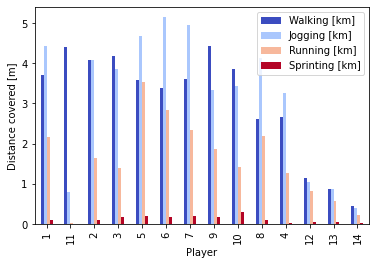

In [27]:
# Plot a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

In [28]:
# Sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    nsprints.append( np.sum( player_sprints == 1 ) )
home_summary['# sprints'] = nsprints

In [29]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],# sprints
1,94.104000,10.418124,3.708538,4.434862,2.177109,0.097614,5
11,94.104000,5.237010,4.413459,0.786952,0.031087,0.005512,0
2,94.104000,9.896841,4.083395,4.077484,1.632026,0.103936,3
3,94.104000,9.591745,4.179823,3.851974,1.394199,0.165750,7
5,94.104000,11.979224,3.588130,4.666655,3.532567,0.191871,7
6,94.104000,11.573299,3.388722,5.150761,2.846101,0.187716,8
7,94.104000,11.108719,3.613849,4.960861,2.342095,0.191915,8
9,94.104000,9.803775,4.439447,3.328606,1.869363,0.166359,7
10,83.825333,9.019024,3.862551,3.433265,1.423594,0.299614,13
8,70.740667,9.046879,2.605117,4.137275,2.201993,0.102494,6


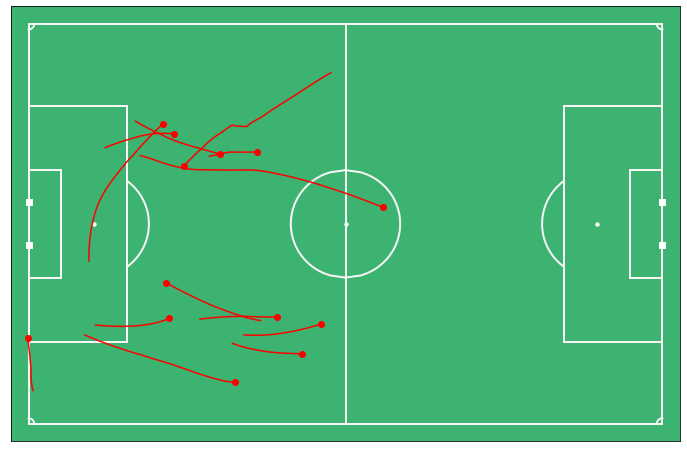

In [30]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s],tracking_home[column_y].iloc[s],'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1],tracking_home[column_y].iloc[s:e+1],'r')


In [31]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.407679,0.0,0.0,0.0,NaN,NaN,NaN,1.6430,0.578,1.741704
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.359875,0.0,0.0,0.0,NaN,NaN,NaN,1.6165,1.496,2.202519
141154,2,5646.16,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,1.252428,0.0,0.0,0.0,NaN,NaN,NaN,1.1395,2.278,2.547105


In [32]:
# Estimate top speed of each player

In [34]:
# Calculate accelerations for each player

def remove_player_accelerations(team):

    columns = [c for c in team.columns if c.split('_')[-1] in ['vx','vy','ax','ay','speed','acceleration']] # Get the player ids
    team = team.drop(columns=columns)
    return team

def calc_player_accelerations(tracking_team):

    remove_player_accelerations(tracking_team)
    player_ids = np.unique( [ c[:-2] for c in tracking_team.columns if (c[:4] in ['Home','Away'] and c[-2] not in ['v', 'e'])] )
    #print(player_ids)
    dt = tracking_team['Time [s]'].diff()
        
    for player in player_ids:
        ax = tracking_team[player+"_vx"].diff() / dt
        ay = tracking_team[player+"_vy"].diff() / dt
        
        tracking_team[player + "_ax"] = ax
        tracking_team[player + "_ay"] = ay
        tracking_team[player + "_acceleration"] = np.sqrt( ax**2 + ay**2 )

    return tracking_team


In [35]:
tracking_home = calc_player_accelerations(tracking_home)
tracking_away = calc_player_accelerations(tracking_away)

In [36]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_acceleration,Home_7_ax,Home_7_ay,Home_7_acceleration,Home_8_ax,Home_8_ay,Home_8_acceleration,Home_9_ax,Home_9_ay,Home_9_acceleration
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_23_acceleration,Away_24_ax,Away_24_ay,Away_24_acceleration,Away_25_ax,Away_25_ay,Away_25_acceleration,Away_26_ax,Away_26_ay,Away_26_acceleration
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
